## Studi Kasus Regresi Linear Sederhana

## 1) Load Data

In [5]:
import pandas as pd

## buat data frame
df = pd.read_csv('../data/socr.csv', sep = ',')
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [6]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


## 2) Pra Proses Data, Konversi data menjadi satuan cm (tinggi) dan kg (berat)

In [8]:
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
    .rename(columns={"Height(Inches)": "tinggi_cm",
                     "Weight(Pounds)": "berat_kg"})
    .assign(
        tinggi_cm=lambda d: d["tinggi_cm"] * 2.54,   # in -> cm
        berat_kg=lambda d: d["berat_kg"] * 0.45359237   # lb -> kg
    )
    .round({"tinggi_cm": 2, "berat_kg": 2})
    .copy()
)

df1.head()

,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


## 5) Pembagian Data, 80% data train & 20% data test

In [14]:
from sklearn.model_selection import train_test_split

# Variable independent/bebas/fitur : tinggi badan
X = df1[['tinggi_cm']]
# Variable dependen/terikat/target : berat badan
y = df1[['berat_kg']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 7
)

print('Jumlah data training', len(X_train))
print('Jumlah data testing', len(X_test))

Jumlah data training 20000
Jumlah data testing 5000


## Pemodelan : Training dan Testing Data

In [13]:
!jupyter kernelspec list

import sys
print(sys.executable)

Available kernels:
  py313      C:\Users\LENOVO\AppData\Roaming\jupyter\kernels\py313
  python3    C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\share\jupyter\kernels\python3
C:\Users\LENOVO\AppData\Local\Programs\Python\Python313\python.exe


In [18]:
from sklearn.linear_model import LinearRegression

# Buat objek instan dari class LinearRegression bernama model
model = LinearRegression()

# Jalankan Training
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 7) Evaluasi Model

In [24]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Prediksi dgn data testing
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

df_resume = pd.DataFrame()
df_resume['No'] = ['1']
df_resume['Koefisien (Kg/cm)'] = model.coef_[0]
df_resume['Intersep (Kg)'] = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
df_resume['MSE (Kg)'] = mse
df_resume['RMSE (Kg)'] = rmse
df_resume['R-Squared'] = r2

df_resume

,No,Koefisien (Kg/cm),Intersep (Kg),MSE (Kg),RMSE (Kg),R-Squared
0,1,0.551823,3.670411,21.242938,4.609006,0.249893


## 8) Persamaan Regresi

In [33]:
slope = model.coef_.item()
intercept = model.intercept_.item()
print(f"persamaan : y = {slope:.3f}* x + {intercept:.3f} ")

persamaan : y = 0.552* x + -37.657 


## 9) Plot Regresi

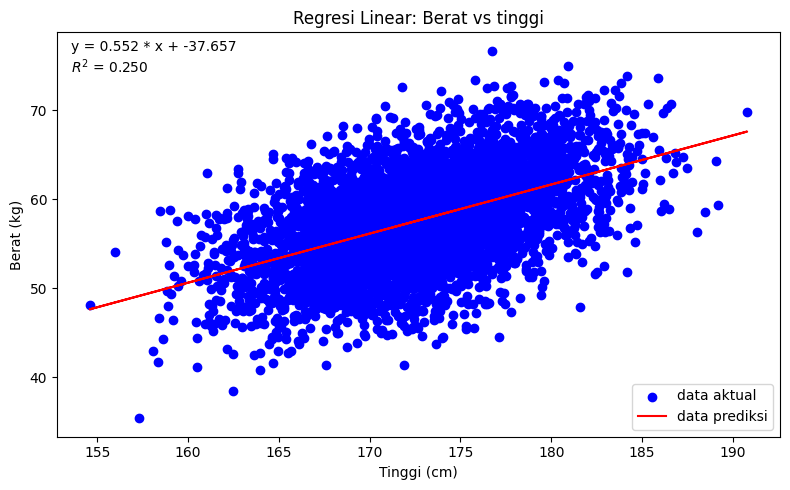

In [35]:
import matplotlib.pyplot as plt

# plot data scatter
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='data aktual')
# garis regresi
plt.plot(X_test, y_pred, color='red', label='data prediksi')
plt.xlabel('Tinggi (cm)')
plt.ylabel('Berat (kg)')
plt.title('Regresi Linear: Berat vs tinggi')
plt.text(
    0.02, 0.98,
    f"y = {slope:.3f} * x + {intercept:.3f}\n$R^2$ = {r2:.3f}",
    transform=plt.gca().transAxes,va="top"
)
plt.legend()
plt.tight_layout()
plt.show()